In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# a_l = ['usr_0', 'usr_1', 'usr_2', 'prxy_0', 'prxy_1', 'src1_0', 'src1_1', 'src1_2', 'src2_0', 'src2_1', 'src2_2']
a_l = ['hm_0', 'hm_1', 'prn_0', 'prn_1', 'stg_0', 'stg_1', 'ts_0']

u3_col = ['Type', 'Offset', 'Size']
dp_col = ['Type', 'Offset', 'Size', 'ResponseTime']

for i in a_l:
    tt_df = pd.read_csv(f'./dp_{i}.csv',names=dp_col)
    print(f'dp_{i} 결측 ')
    print(tt_df.isnull().sum())

dp_hm_0 결측 
Type            0
Offset          0
Size            0
ResponseTime    0
dtype: int64
dp_hm_1 결측 
Type            0
Offset          0
Size            0
ResponseTime    0
dtype: int64
dp_prn_0 결측 
Type            0
Offset          0
Size            0
ResponseTime    0
dtype: int64
dp_prn_1 결측 
Type            0
Offset          0
Size            0
ResponseTime    0
dtype: int64
dp_stg_0 결측 
Type            0
Offset          0
Size            0
ResponseTime    0
dtype: int64
dp_stg_1 결측 
Type            0
Offset          0
Size            0
ResponseTime    0
dtype: int64
dp_ts_0 결측 
Type            0
Offset          0
Size            0
ResponseTime    0
dtype: int64


In [3]:
for i in a_l:
    dp_df = pd.read_csv(f'./dp_{i}.csv',names=dp_col)
    u3_df = dp_df.drop(labels='ResponseTime', axis=1)
    x = dp_df.duplicated().sum()
    y = u3_df.duplicated().sum()
    print(f'dp_{i:7} 중복 row : {x:7},   u3_{i:7} 중복 row : {y:7},   두개의 차이 = {y-x:7}', end='\n')

dp_hm_0    중복 row :   19968,   u3_hm_0    중복 row :   65007,   두개의 차이 =   45039
dp_hm_1    중복 row :   13570,   u3_hm_1    중복 row :   93018,   두개의 차이 =   79448
dp_prn_0   중복 row :   18205,   u3_prn_0   중복 row :   44323,   두개의 차이 =   26118
dp_prn_1   중복 row :    1504,   u3_prn_1   중복 row :   40540,   두개의 차이 =   39036
dp_stg_0   중복 row :   37091,   u3_stg_0   중복 row :   80318,   두개의 차이 =   43227
dp_stg_1   중복 row :   13406,   u3_stg_1   중복 row :   84787,   두개의 차이 =   71381
dp_ts_0    중복 row :    8729,   u3_ts_0    중복 row :   82308,   두개의 차이 =   73579


'ResponseTime' 의 경우 스토리지의 상태에 따라 반응 속도의 차이가 있을 수 있기에 같은 'Offset'에서의 호출인지 확인 하기 위해 'Type', 'Offset', 'Size'만을 사용하여 평가

dp의 경우 'ResponseTime'를 삭제 하지 않아 스토리지의 상태에 따른 차이로 인해 원하는 결과를 얻지 못하는 문제가 발생 'ResponseTime'을 제거한 u3을 이용 하여 원하는 결과 도출 u3와 dp의 비교로 전처리에 따른 결과를 표현 가능

스토리지 상태에 따라 같은 'Offset'을 불러들여져 와도 'ResponseTime'은 다를 가능성이 높음

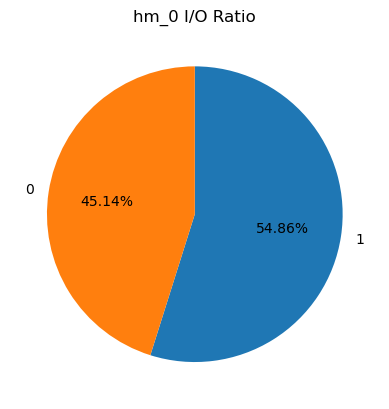

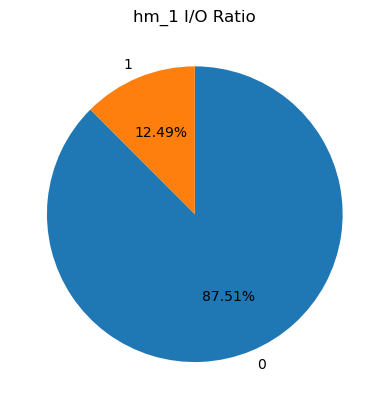

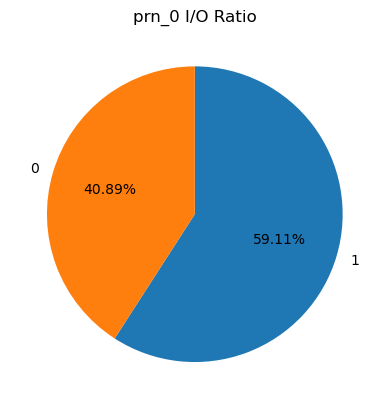

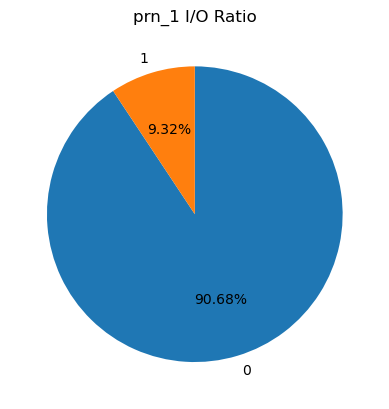

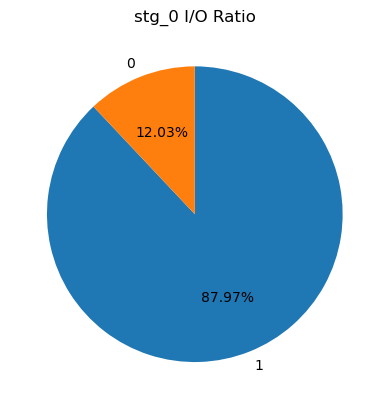

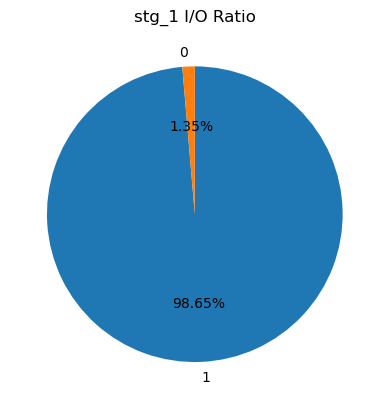

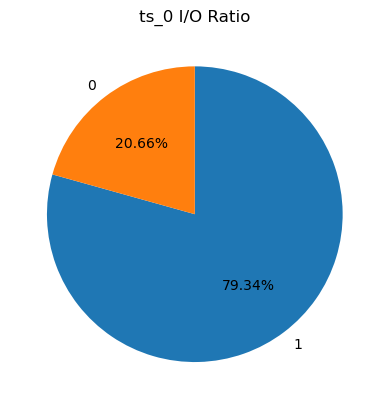

In [4]:
#1.

for i in a_l:
    tt_df = pd.read_csv(f'./dp_{i}.csv',names=dp_col)
    tt_df = tt_df.drop(labels='ResponseTime', axis=1)
    
    ratio = tt_df.Type.value_counts()
    labels = tt_df.Type.value_counts().index
    plt.pie(ratio, labels=labels, autopct='%.2f%%', startangle=90, counterclock=False)
    plt.title(f'{i} I/O Ratio')
    plt.show()

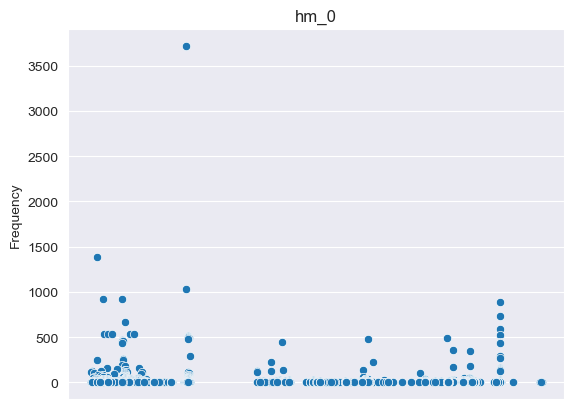

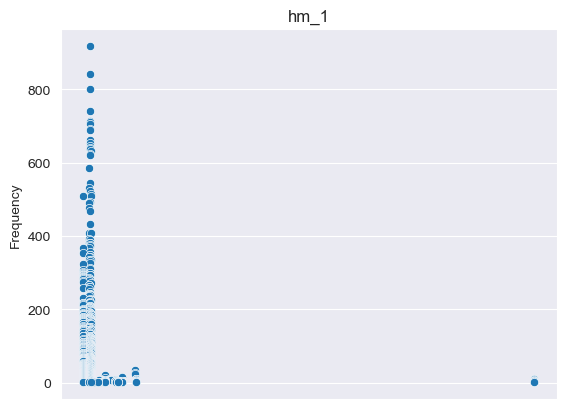

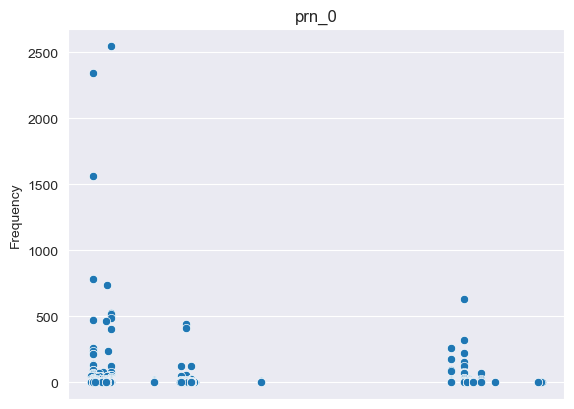

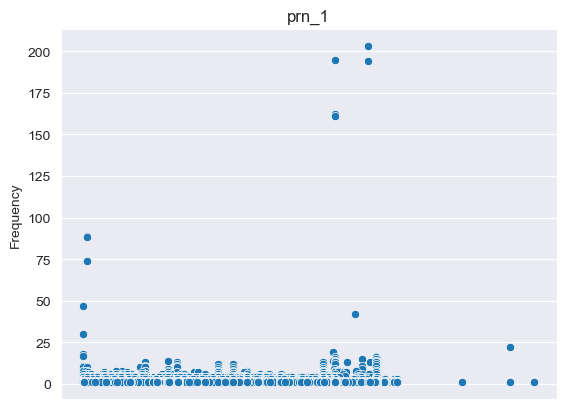

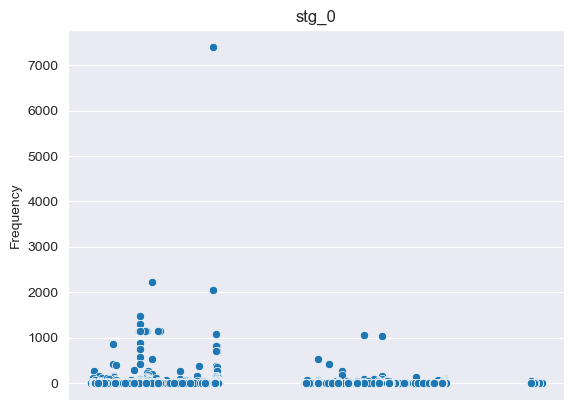

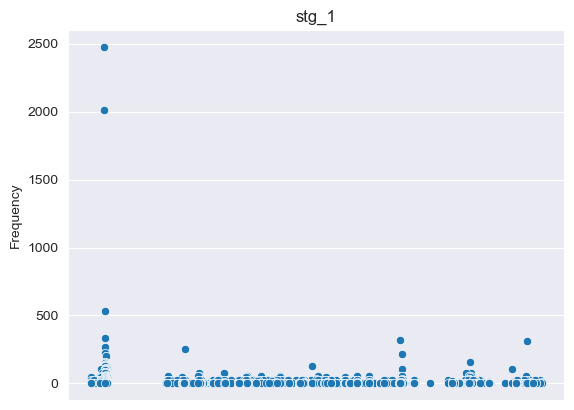

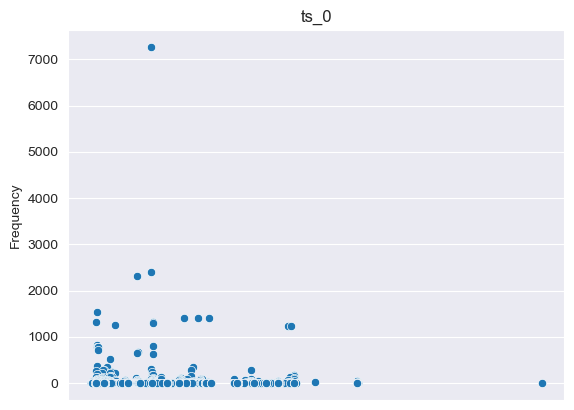

In [5]:
2. -1

import seaborn as sns

sns.set_style('darkgrid')

import math

def offset_log(x):
    return math.log(x, 2)

for i in a_l:
    tt_df = pd.read_csv(f'./dp_{i}.csv',names=dp_col)
    tt_df = tt_df.drop(labels='ResponseTime', axis=1)

    
    xx = tt_df.Offset.value_counts()
    df_f = xx.rename('Frequency').reset_index()
    df_f = df_f.rename(columns={'index':'Offset'})

    df_f_min = df_f.Offset.min()
    df_f_max = df_f.Offset.max()
    df_f_min = math.log(df_f_min, 2)
    df_f_max = math.log(df_f_max, 2)
    
    df_f['Offset_log'] = df_f.Offset.apply(offset_log)

#     print(f'u3_{i:10}  : ', end='\n')
    sns.scatterplot(data=df_f, x='Offset', y='Frequency')
#     sns.scatterplot(data=df_f, x='Offset_log', y='Frequency')
#     plt.xlim([df_f_min, df_f_max])
    plt.gca().axes.xaxis.set_visible(False)
    plt.title(f'{i}')
    plt.show()

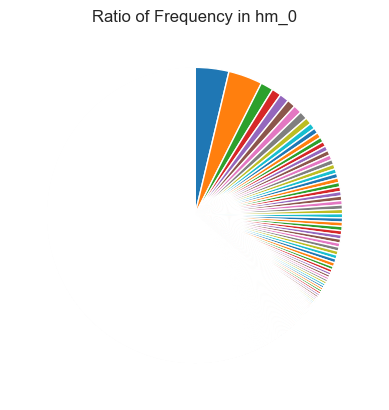

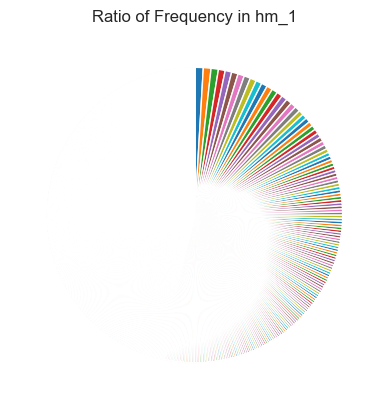

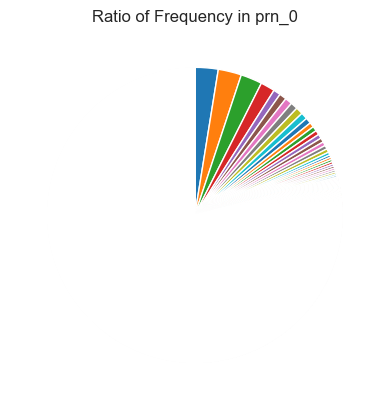

KeyboardInterrupt: 

In [6]:
# 2. -2
for i in a_l:
    tt_df = pd.read_csv(f'./dp_{i}.csv',names=dp_col)
    tt_df = tt_df.drop(labels='ResponseTime', axis=1)

    plt.pie(
        tt_df.Offset.value_counts(),
        startangle=90,
        counterclock=False
    )  
    
    plt.title(f'Ratio of Frequency in {i}')
    plt.show()

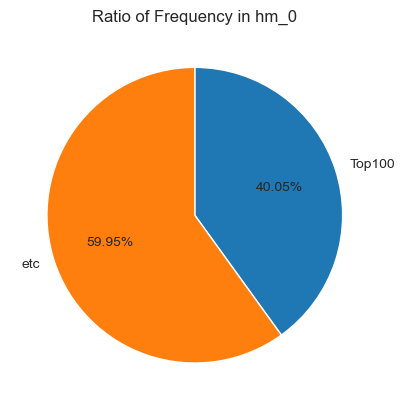

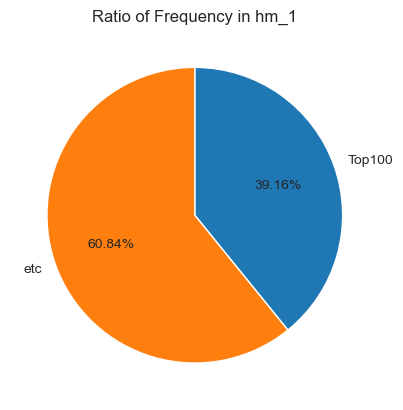

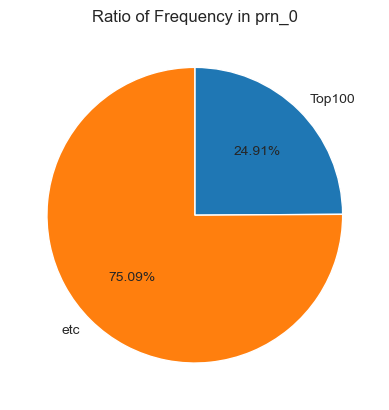

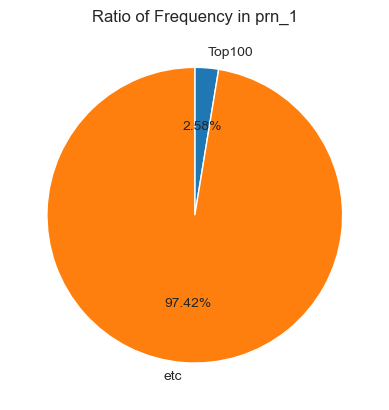

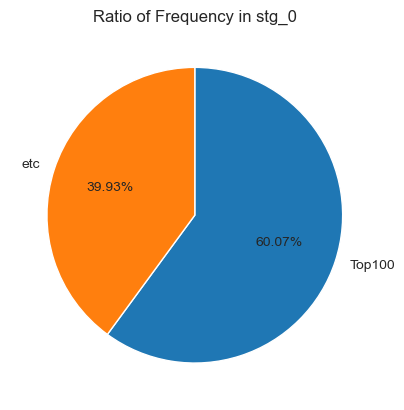

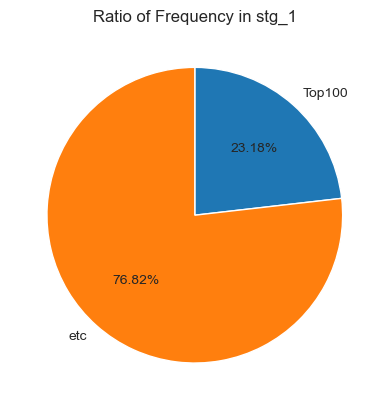

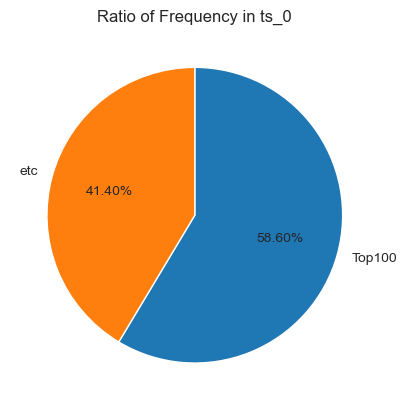

In [7]:
for i in a_l:
    tt_df = pd.read_csv(f'./dp_{i}.csv',names=dp_col)
    tt_df = tt_df.drop(labels='ResponseTime', axis=1)
    
    
    topn = 100
    total = tt_df.Offset.value_counts().values.sum()
    top = tt_df.Offset.value_counts().head(topn).values.sum()
    etc = total - top
    plt.pie([top, etc], labels=[f'Top{topn}', 'etc'], autopct='%.2f%%', startangle=90, counterclock=False)
    plt.title(f'Ratio of Frequency in {i}')
    plt.show()